# Project Name: Global corona pandemic data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# Load Dataset

df = pd.read_csv("worldometer_coronavirus_summary_data.csv")

print(df.head())
print(df.columns)


       country continent  total_confirmed  total_deaths  total_recovered  \
0  Afghanistan      Asia           179267        7690.0         162202.0   
1      Albania    Europe           275574        3497.0         271826.0   
2      Algeria    Africa           265816        6875.0         178371.0   
3      Andorra    Europe            42156         153.0          41021.0   
4       Angola    Africa            99194        1900.0          97149.0   

   active_cases  serious_or_critical  total_cases_per_1m_population  \
0        9375.0               1124.0                           4420   
1         251.0                  2.0                          95954   
2       80570.0                  6.0                           5865   
3         982.0                 14.0                         543983   
4         145.0                  NaN                           2853   

   total_deaths_per_1m_population  total_tests  total_tests_per_1m_population  \
0                           190.0  

In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    218 non-null    float64
 4   total_recovered                 204 non-null    float64
 5   active_cases                    204 non-null    float64
 6   serious_or_critical             145 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  218 non-null    float64
 9   total_tests                     212 non-null    float64
 10  total_tests_per_1m_population   212 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64

In [5]:
df.fillna(0, inplace=True)

In [6]:
df[['active_cases','total_recovered','total_deaths']].sum()

active_cases        13996500.0
total_recovered    460397633.0
total_deaths         6288083.0
dtype: float64

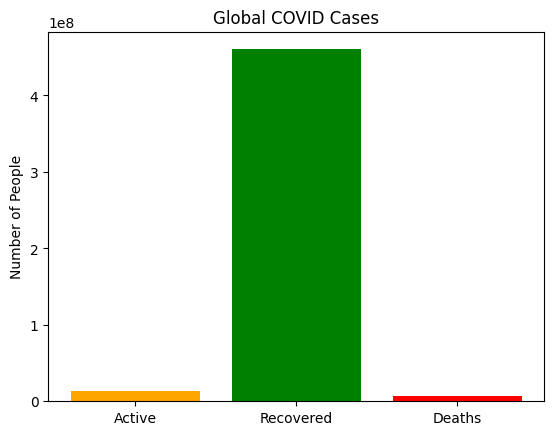

In [7]:
active = df['active_cases'].sum()
recovered = df['total_recovered'].sum()
deaths = df['total_deaths'].sum()

# Easy bar plot
plt.bar(['Active','Recovered','Deaths'], [active, recovered, deaths], color=['orange','green','red'])
plt.title("Global COVID Cases")
plt.ylabel("Number of People")
plt.show()

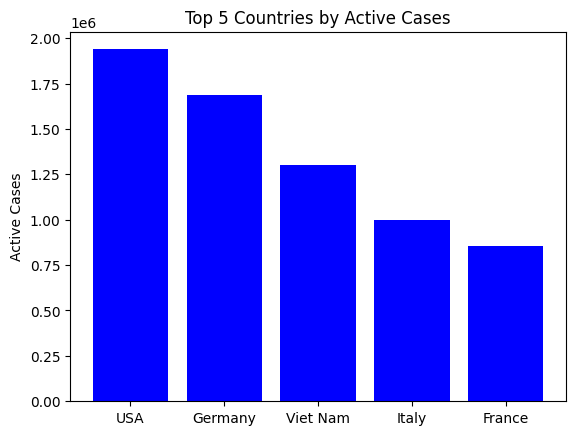

In [8]:
top5_active = df[['country','active_cases']].sort_values(by='active_cases', ascending=False).head(5)

plt.bar(top5_active['country'], top5_active['active_cases'], color='blue')
plt.title("Top 5 Countries by Active Cases")
plt.ylabel("Active Cases")
plt.show()

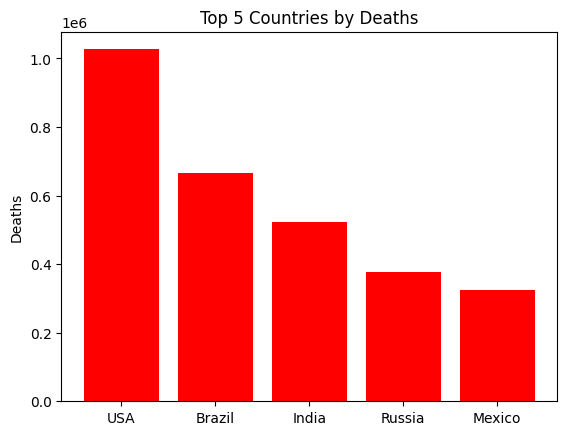

In [9]:
top5_deaths = df[['country','total_deaths']].sort_values(by='total_deaths', ascending=False).head(5)

plt.bar(top5_deaths['country'], top5_deaths['total_deaths'], color='red')
plt.title("Top 5 Countries by Deaths")
plt.ylabel("Deaths")
plt.show()


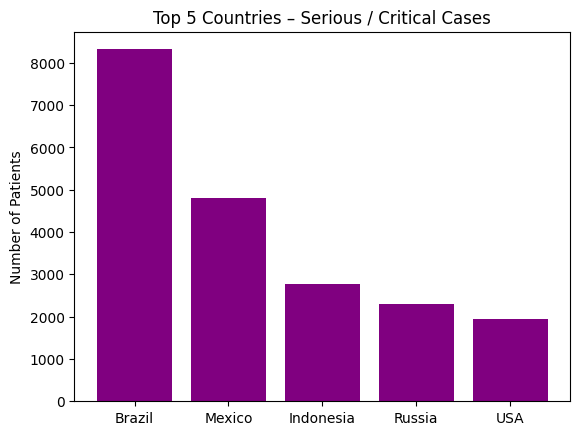

In [10]:
top5_serious = df[['country','serious_or_critical']].sort_values(by='serious_or_critical', ascending=False).head(5)

plt.bar(top5_serious['country'], top5_serious['serious_or_critical'], color='purple')
plt.title("Top 5 Countries – Serious / Critical Cases")
plt.ylabel("Number of Patients")
plt.show()


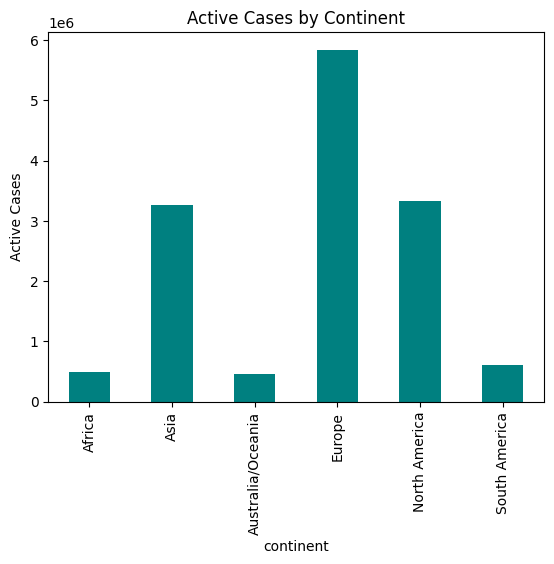

In [11]:
continent_active = df.groupby('continent')['active_cases'].sum()

continent_active.plot(kind='bar', color='teal')
plt.title("Active Cases by Continent")
plt.ylabel("Active Cases")
plt.show()